In [91]:
import numpy as np
import math
from copy import deepcopy

import matplotlib.pyplot as plt

import sys
sys.path.append("../")

from data.simulated.simulate import group_sizes, shuffle_split, cartesian_product, node_community_assignment, node_community_to_onehot

In [92]:
num_nodes = 100
num_communities = 4
label=0
intra_edge_prob = [0.01]
inter_edge_prob = [[0.5, 0.8, 0.8, 0.9]]
overlap_communities = [1, 2]

In [93]:
def make_symmetric(matrix):
    
    diag = list(matrix.diagonal())
    matrix *= np.tri(*matrix.shape, k=-1).astype(matrix.dtype)
    matrix += matrix.T 
    np.fill_diagonal(matrix, diag)

    return matrix

In [94]:
# divide nodes amongst communities
community_sizes = group_sizes(num_nodes, num_communities)
# initialize node community assignment
node_community = node_community_assignment(community_sizes)

In [95]:
# initialze community edge probability matrix
community_edge_probability = np.ones((num_communities, num_communities)) * intra_edge_prob[label] 
np.fill_diagonal(community_edge_probability, inter_edge_prob[label])

In [96]:
node_community_one_hot = node_community_to_onehot(node_community)
prob_edge = (node_community_one_hot @ community_edge_probability) @ node_community_one_hot.T

comm1 = min(overlap_communities)
nodes_overlap1 = list(range(math.ceil(np.mean(node_community[comm1])), np.max(node_community[comm1]) + 1))

comm2 = max(overlap_communities)
nodes_overlap2 = list(range(np.min(node_community[comm2]), math.floor(np.mean(node_community[comm2])) + 1))

nodes_overlap_combined = nodes_overlap1 + nodes_overlap2
edges = cartesian_product(nodes_overlap_combined, nodes_overlap_combined)

edges_ts = shuffle_split(edges, 4)

for edges in edges_ts:

    node_community = deepcopy(node_community)
    
    nodes_from = list(set(edges[edges[:, 0] == edges[:, 1]][:, 0]).intersection(set(node_community[comm1])))
    nodes_to = node_community[comm2]

    nodes_to = nodes_to + nodes_from
    nodes_to.sort()
    node_community[comm2] = nodes_to

    # print(node_community)

    prob_edge[edges[:, 1], edges[:, 0]] = 1

    prob_edge = make_symmetric(prob_edge)

    plt.imshow(prob_edge, vmin=0, vmax=1)
    plt.show()

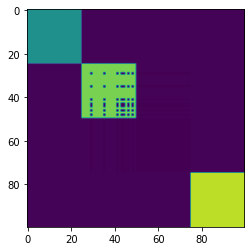

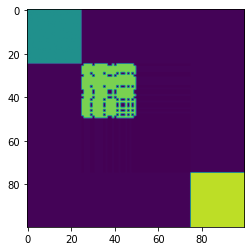

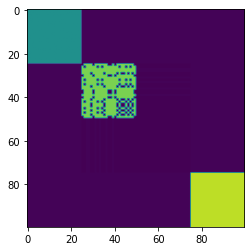

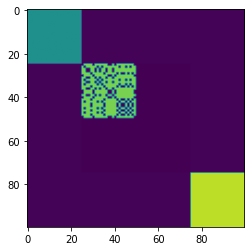

In [102]:
node_community = node_community_assignment(community_sizes)

community_edge_probability = np.ones((num_communities, num_communities)) * intra_edge_prob[label] 
np.fill_diagonal(community_edge_probability, inter_edge_prob[label])

comm1 = min(overlap_communities)
comm2 = max(overlap_communities)

node_community_one_hot = node_community_to_onehot(node_community)
prob_edge = (node_community_one_hot @ community_edge_probability) @ node_community_one_hot.T

nodes_from = node_community[comm1]

nodes_from_ts = shuffle_split(nodes_from, 4)

for nodes_from in nodes_from_ts:

    nodes_to = node_community[comm2] + nodes_from
    edges = cartesian_product(nodes_to, nodes_to)

    prob_edge[edges[:, 0], edges[:, 1]] = 0 #inter_edge_prob[label][comm2]

    prob_edge = make_symmetric(prob_edge)

    plt.imshow(prob_edge, vmin=0, vmax=1)
    plt.show()

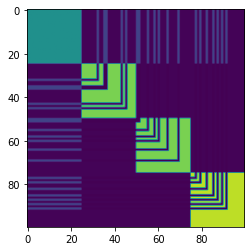

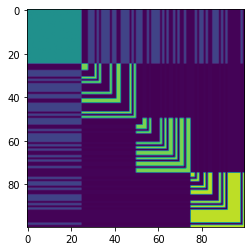

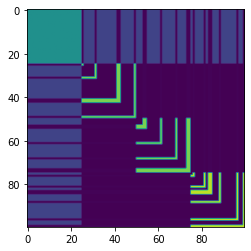

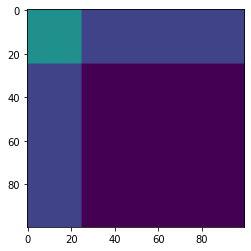

In [37]:
node_community_one_hot = node_community_to_onehot(node_community)
prob_edge = (node_community_one_hot @ community_edge_probability) @ node_community_one_hot.T

nodes_from = node_community[1] + node_community[2] + node_community[3]

nodes_from_ts = shuffle_split(nodes_from, 4)

for nodes_from in nodes_from_ts:

    for c in list(set(range(num_communities)) - set([0])):
        
        edges = cartesian_product(nodes_from, node_community[c])
        prob_edge[edges[:, 0], edges[:, 1]] = 0.0

    edges = cartesian_product(nodes_from, node_community[0])

    prob_edge[edges[:, 0], edges[:, 1]] = 0.2

    prob_edge = make_symmetric(prob_edge)

    plt.imshow(prob_edge, vmin=0, vmax=1)
    plt.show()